## Importing the libraries

In [26]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from urllib import request

In [27]:
url = "https://www.jumia.co.ke/all-products/"
requests = requests.get(url)

In [28]:
## Parsing the html soup
soup = BeautifulSoup(requests.text,"html.parser")

In [29]:
items = soup.find_all("article", attrs = {"class":"prd _fb col c-prd"})

In [30]:
print(len(items))

40


In [31]:
print(items[0])

<article class="prd _fb col c-prd"><a class="core" data-gtm-brand="NIVEA" data-gtm-category="Health &amp; Beauty/Beauty &amp; Personal Care/Personal Care/Skin Care/Face/Cleansers" data-gtm-dimension23="" data-gtm-dimension26="2215" data-gtm-dimension27="4.5" data-gtm-dimension28="1" data-gtm-dimension37="0" data-gtm-dimension43="BDEAL|BLF|BLF_02|Boost|COL_216|COL_224|COL_260|COL_295|COL_297|COL_302|COL_317|CP_24|CP_26|CP_MT117|CP_UN17|CP_UN19|CP_UN238|CP_UN247|CP_UN250|CP_UN255|CP_UN261|CP_UN34|CP_UN5|CP_UN9|CP_UN94|DOW_100|INV_CLEAR|JA23_01|JMALL|TBOOST|WCS|XMAS|XMAS22|XMAS22_01" data-gtm-dimension44="0" data-gtm-id="NI534ST01U2JENAFAMZ" data-gtm-list="" data-gtm-name="Perfect &amp; Radiant Even Tone Day And Night Cream For Women - 50ml" data-gtm-position="1" data-gtm-price="6.39" data-track-onclick="eecProduct" data-track-onview="eecProduct" href="/nivea-perfect-radiant-even-tone-day-and-night-cream-for-women-50ml-68528030.html"><div class="img-c"><img alt="" class="img" data-lazy="t

In [32]:
first_items = items[0]
first_items_name =first_items.find("h3",attrs = {"class":"name"}).text

In [33]:
print(first_items_name)

NIVEA Perfect & Radiant Even Tone Day And Night Cream For Women - 50ml


In [34]:
##price
first_items = items[0]
first_items_price = first_items.find("div", attrs = {"class":"prc"}).text

In [35]:
print(first_items_price)

KSh 999


In [36]:
##old price

first_items = items[0]
first_items_old_price = first_items.find("div", attrs = {"class":"old"}).text

In [37]:
print(first_items_old_price)

KSh 1,560


In [38]:
##discount
first_items = items[0]
first_items_discount = first_items.find("div", attrs = {"class":"bdg _dsct _sm"}).text

In [39]:
print(first_items_discount)

36%


In [40]:
##product link
first_items = items[0]
first_items_link = first_items.find("a", attrs = {"class":"core"}).get("href")

In [41]:
print(first_items_link)


/nivea-perfect-radiant-even-tone-day-and-night-cream-for-women-50ml-68528030.html


In [42]:
records= []
for item in items:
    try:
        item_name =item.find("h3",attrs = {"class":"name"}).text
        current_price =item.find("div", attrs = {"class":"prc"}).text
        old_price_element = item.find("div", attrs = {"class":"old"})
        item_discount_element = item.find("div", attrs = {"class":"bdg _dsct _sm"})
        item_link = item.find("a", attrs = {"class":"core"}).get("href")

        if old_price_element: 
            old_price = old_price_element.text
        else:
            old_price = None
        if item_discount_element:
            item_discount = item_discount_element.text
        else:
            item_dicount = None
        records.append(( item_name, current_price,old_price, item_discount, item_link))

    except AttributeError:
        records.append(None)
print(len(records))


40


In [43]:
records

[('NIVEA Perfect & Radiant Even Tone Day And Night Cream For Women - 50ml',
  'KSh 999',
  'KSh 1,560',
  '36%',
  '/nivea-perfect-radiant-even-tone-day-and-night-cream-for-women-50ml-68528030.html'),
 ('NIVEA Radiant & Beauty Advanced Care Lotion For Women - 400ml (Pack Of 2)',
  'KSh 949',
  'KSh 1,460',
  '35%',
  '/nivea-radiant-beauty-advanced-care-lotion-for-women-400ml-pack-of-2-94993120.html'),
 ('NIVEA Nourishing Cocoa Body Lotion With Cocoa Butter 400ml (Pack Of 2)',
  'KSh 1,174',
  'KSh 1,302',
  '10%',
  '/nivea-nourishing-cocoa-body-lotion-with-cocoa-butter-400ml-pack-of-2-68528031.html'),
 ('NIVEA Pearl & Beauty Anti-Perspirant Rollon, 48h - 50ml (Pack Of 2)',
  'KSh 728',
  'KSh 1,040',
  '30%',
  '/nivea-pearl-beauty-anti-perspirant-rollon-48h-50ml-pack-of-2-68528032.html'),
 ('NIVEA MEN Deep Antibacterial Anti-Perspirant Rollon,48h - 50ml (Pack Of 2)',
  'KSh 728',
  'KSh 1,040',
  '30%',
  '/nivea-men-deep-antibacterial-anti-perspirant-rollon48h-50ml-pack-of-2-685280

In [47]:
import time
import requests
from bs4 import BeautifulSoup

base_url = "https://www.jumia.co.ke/all-products/?page={}#catalog-listing"
records = []

for page_number in range(1, 51):
    url = base_url.format(page_number)
    time.sleep(5)
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        print(f"Page {page_number} scrapped successfully")
        items = soup.find_all("article", attrs={"class": "prd _fb col c-prd"})
        for item in items:
            try:
                item_name = item.find("h3", attrs={"class": "name"}).text
                current_price = item.find("div", attrs={"class": "prc"}).text
                old_price_element = item.find("div", attrs={"class": "old"})
                item_discount_element = item.find("div", attrs={"class": "bdg _dsct _sm"})
                item_link = item.find("a", attrs={"class": "core"}).get("href")
                
                if old_price_element:
                    old_price = old_price_element.text
                else:
                    old_price = None
                if item_discount_element:
                    item_discount = item_discount_element.text
                else:
                    item_discount = None
                records.append((item_name, current_price, old_price, item_discount, item_link))
            except AttributeError:
                records.append(None)
    else:
        print(f"Page {page_number} not scrapped")

# Process records further as needed


Page 1 scrapped successfully
Page 2 scrapped successfully
Page 3 scrapped successfully
Page 4 scrapped successfully
Page 5 scrapped successfully
Page 6 scrapped successfully
Page 7 scrapped successfully
Page 8 scrapped successfully
Page 9 scrapped successfully
Page 10 scrapped successfully
Page 11 scrapped successfully
Page 12 scrapped successfully
Page 13 scrapped successfully
Page 14 scrapped successfully
Page 15 scrapped successfully
Page 16 scrapped successfully
Page 17 scrapped successfully
Page 18 scrapped successfully
Page 19 scrapped successfully
Page 20 scrapped successfully
Page 21 scrapped successfully
Page 22 scrapped successfully
Page 23 scrapped successfully
Page 24 scrapped successfully
Page 25 scrapped successfully
Page 26 scrapped successfully
Page 27 scrapped successfully
Page 28 scrapped successfully
Page 29 scrapped successfully
Page 30 scrapped successfully
Page 31 scrapped successfully
Page 32 scrapped successfully
Page 33 scrapped successfully
Page 34 scrapped su

In [48]:
len(records)

2000

In [49]:
data = pd.DataFrame(records, columns =["item_name","current_price","old_price_element","item_discount_element","item_link"])

In [50]:
data.head()

,item_name,current_price,old_price_element,item_discount_element,item_link
0,NIVEA Perfect & Radiant Even Tone Day And Nigh...,KSh 999,"KSh 1,560",36%,/nivea-perfect-radiant-even-tone-day-and-night...
1,NIVEA Radiant & Beauty Advanced Care Lotion Fo...,KSh 949,"KSh 1,460",35%,/nivea-radiant-beauty-advanced-care-lotion-for...
2,NIVEA Nourishing Cocoa Body Lotion With Cocoa ...,"KSh 1,174","KSh 1,302",10%,/nivea-nourishing-cocoa-body-lotion-with-cocoa...
3,"NIVEA Pearl & Beauty Anti-Perspirant Rollon, 4...",KSh 728,"KSh 1,040",30%,/nivea-pearl-beauty-anti-perspirant-rollon-48h...
4,NIVEA MEN Deep Antibacterial Anti-Perspirant R...,KSh 728,"KSh 1,040",30%,/nivea-men-deep-antibacterial-anti-perspirant-...


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   item_name              2000 non-null   object
 1   current_price          2000 non-null   object
 2   old_price_element      1749 non-null   object
 3   item_discount_element  1749 non-null   object
 4   item_link              2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB


## Data Cleaning Process

In [54]:
## filtering out prices that have a range
data['current_price'] = data['current_price'].apply(lambda x: x[4:] )

In [56]:
data = data.dropna()

In [70]:
data['old_price_element'] = data['old_price_element'].apply(lambda x: x[4:] )
data['item_discount_element'] = data['item_discount_element'].apply(lambda x: x[:2] )
data


,item_name,current_price,old_price_element,item_discount_element,item_link
0,NIVEA Perfect & Radiant Even Tone Day And Nigh...,999,0,36,/nivea-perfect-radiant-even-tone-day-and-night...
1,NIVEA Radiant & Beauty Advanced Care Lotion Fo...,949,0,35,/nivea-radiant-beauty-advanced-care-lotion-for...
2,NIVEA Nourishing Cocoa Body Lotion With Cocoa ...,"1,174",2,10,/nivea-nourishing-cocoa-body-lotion-with-cocoa...
3,"NIVEA Pearl & Beauty Anti-Perspirant Rollon, 4...",728,0,30,/nivea-pearl-beauty-anti-perspirant-rollon-48h...
4,NIVEA MEN Deep Antibacterial Anti-Perspirant R...,728,0,30,/nivea-men-deep-antibacterial-anti-perspirant-...
...,...,...,...,...,...
1995,Always 3l Vacuum Thermos Flask - Stainless Steel,"2,175",0,32,/always-3l-vacuum-thermos-flask-stainless-stee...
1996,"Fashion 3PCS NET SEAMLESS COTTON UNDERWEAR, LA...",721,,3%,/fashion-3pcs-net-seamless-cotton-underwear-la...
1997,"Itel 5081 2.40 "",Triple SIM/It5081, Kabambe Bu...","2,550",0,35,/itel-5081-2.40-triple-simit5081-kabambe-butto...
1998,Faiba JTL 4G PORTABLE WIFI MIFI ROUTER,"6,998",0,1%,/faiba-jtl-4g-portable-wifi-mifi-router-486406...


In [71]:
selected_rows = data[data['current_price'].str.contains('-')| data['old_price_element'].str.contains('-')]

selected_rows

,item_name,current_price,old_price_element,item_discount_element,item_link
70,Fashion 2024 Mens Casual High-Top Shoes Runnin...,"1,860","5 - KSh 3,576",48,/fashion-2024-mens-casual-high-top-shoes-runni...
80,Fashion 2024 Women's New Classic Fashion Sport...,839,"2 - KSh 1,613",48,/fashion-2024-womens-new-classic-fashion-sport...
83,Fashion 3PCs Pure Cotton Multicolor Men's Boxe...,559 - KSh 799,,44,/3pcs-pure-cotton-multicolor-mens-boxers-multi...
88,Fashion Women's Floral Sleeve Office Long Grow...,"1,050","0 - KSh 1,568",33,/fashion-womens-floral-sleeve-office-long-grow...
95,Hiqh Quality Pure White Duvet Set (1 Duvet 1 B...,"2,199 - KSh 2,600","0 - KSh 2,600",12,/generic-hiqh-quality-pure-white-duvet-set-1-d...
...,...,...,...,...,...
1963,Luodais Classic Human Hair Wig/ Weave Repair S...,570 - KSh 770,"0 - KSh 1,300",43,/luodais-classic-human-hair-wig-weave-repair-s...
1968,4 Piece Cotton Duvet (blue Star) - Luxury Duvet,"2,030 - KSh 2,100",0,19,/generic-4-piece-cotton-duvet-blue-star-luxury...
1971,Dear Body Wild Nights For Men 4in1 Pump Lotion...,"459 - KSh 1,675","- KSh 2,000",43,/wild-nights-for-men-4in1-pump-lotion-splash-g...
1978,Fashion Men's Zipper Pocket Bomber Jacket.,"2,590 - KSh 2,749","0 - KSh 4,900",44,/fashion-mens-zipper-pocket-bomber-jacket.-644...


In [72]:
##split the columns with price ranges to only remain with one price value
##begin with the current price columns
split_values = selected_rows['current_price'].str.split('-', expand=True)

# Extract start_value and end_value from split_values
selected_rows.loc[:, 'price_start_value'] = split_values[0].str.strip()
selected_rows.loc[:, 'price_end_value'] = split_values[1].str.strip()

# Fill missing end_value with start_value
selected_rows['price_end_value'].fillna(selected_rows['price_start_value'], inplace=True)

selected_rows

C:\Users\wwaswa\AppData\Local\Temp\ipykernel_16624\3716473462.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows.loc[:, 'price_start_value'] = split_values[0].str.strip()
C:\Users\wwaswa\AppData\Local\Temp\ipykernel_16624\3716473462.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows.loc[:, 'price_end_value'] = split_values[1].str.strip()
C:\Users\wwaswa\AppData\Local\Temp\ipykernel_16624\3716473462.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,item_name,current_price,old_price_element,item_discount_element,item_link,price_start_value,price_end_value
70,Fashion 2024 Mens Casual High-Top Shoes Runnin...,"1,860","5 - KSh 3,576",48,/fashion-2024-mens-casual-high-top-shoes-runni...,"1,860","1,860"
80,Fashion 2024 Women's New Classic Fashion Sport...,839,"2 - KSh 1,613",48,/fashion-2024-womens-new-classic-fashion-sport...,839,839
83,Fashion 3PCs Pure Cotton Multicolor Men's Boxe...,559 - KSh 799,,44,/3pcs-pure-cotton-multicolor-mens-boxers-multi...,559,KSh 799
88,Fashion Women's Floral Sleeve Office Long Grow...,"1,050","0 - KSh 1,568",33,/fashion-womens-floral-sleeve-office-long-grow...,"1,050","1,050"
95,Hiqh Quality Pure White Duvet Set (1 Duvet 1 B...,"2,199 - KSh 2,600","0 - KSh 2,600",12,/generic-hiqh-quality-pure-white-duvet-set-1-d...,"2,199","KSh 2,600"
...,...,...,...,...,...,...,...
1963,Luodais Classic Human Hair Wig/ Weave Repair S...,570 - KSh 770,"0 - KSh 1,300",43,/luodais-classic-human-hair-wig-weave-repair-s...,570,KSh 770
1968,4 Piece Cotton Duvet (blue Star) - Luxury Duvet,"2,030 - KSh 2,100",0,19,/generic-4-piece-cotton-duvet-blue-star-luxury...,"2,030","KSh 2,100"
1971,Dear Body Wild Nights For Men 4in1 Pump Lotion...,"459 - KSh 1,675","- KSh 2,000",43,/wild-nights-for-men-4in1-pump-lotion-splash-g...,459,"KSh 1,675"
1978,Fashion Men's Zipper Pocket Bomber Jacket.,"2,590 - KSh 2,749","0 - KSh 4,900",44,/fashion-mens-zipper-pocket-bomber-jacket.-644...,"2,590","KSh 2,749"


In [73]:
##old price column
split_values = selected_rows['old_price_element'].str.split('-', expand=True)

# Extract start_value and end_value from split_values
selected_rows.loc[:, 'old_price_start_value'] = split_values[0].str.strip()
selected_rows.loc[:, 'old_price_end_value'] = split_values[1].str.strip()

# Fill missing end_value with start_value
selected_rows['old_price_end_value'].fillna(selected_rows['old_price_start_value'], inplace=True)

selected_rows

C:\Users\wwaswa\AppData\Local\Temp\ipykernel_16624\3216186134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows.loc[:, 'old_price_start_value'] = split_values[0].str.strip()
C:\Users\wwaswa\AppData\Local\Temp\ipykernel_16624\3216186134.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows.loc[:, 'old_price_end_value'] = split_values[1].str.strip()
C:\Users\wwaswa\AppData\Local\Temp\ipykernel_16624\3216186134.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,item_name,current_price,old_price_element,item_discount_element,item_link,price_start_value,price_end_value,old_price_start_value,old_price_end_value
70,Fashion 2024 Mens Casual High-Top Shoes Runnin...,"1,860","5 - KSh 3,576",48,/fashion-2024-mens-casual-high-top-shoes-runni...,"1,860","1,860",5,"KSh 3,576"
80,Fashion 2024 Women's New Classic Fashion Sport...,839,"2 - KSh 1,613",48,/fashion-2024-womens-new-classic-fashion-sport...,839,839,2,"KSh 1,613"
83,Fashion 3PCs Pure Cotton Multicolor Men's Boxe...,559 - KSh 799,,44,/3pcs-pure-cotton-multicolor-mens-boxers-multi...,559,KSh 799,,
88,Fashion Women's Floral Sleeve Office Long Grow...,"1,050","0 - KSh 1,568",33,/fashion-womens-floral-sleeve-office-long-grow...,"1,050","1,050",0,"KSh 1,568"
95,Hiqh Quality Pure White Duvet Set (1 Duvet 1 B...,"2,199 - KSh 2,600","0 - KSh 2,600",12,/generic-hiqh-quality-pure-white-duvet-set-1-d...,"2,199","KSh 2,600",0,"KSh 2,600"
...,...,...,...,...,...,...,...,...,...
1963,Luodais Classic Human Hair Wig/ Weave Repair S...,570 - KSh 770,"0 - KSh 1,300",43,/luodais-classic-human-hair-wig-weave-repair-s...,570,KSh 770,0,"KSh 1,300"
1968,4 Piece Cotton Duvet (blue Star) - Luxury Duvet,"2,030 - KSh 2,100",0,19,/generic-4-piece-cotton-duvet-blue-star-luxury...,"2,030","KSh 2,100",0,0
1971,Dear Body Wild Nights For Men 4in1 Pump Lotion...,"459 - KSh 1,675","- KSh 2,000",43,/wild-nights-for-men-4in1-pump-lotion-splash-g...,459,"KSh 1,675",,"KSh 2,000"
1978,Fashion Men's Zipper Pocket Bomber Jacket.,"2,590 - KSh 2,749","0 - KSh 4,900",44,/fashion-mens-zipper-pocket-bomber-jacket.-644...,"2,590","KSh 2,749",0,"KSh 4,900"


In [74]:
selected_rows.drop(['current_price','old_price_element'],axis = 1,inplace=True)


C:\Users\wwaswa\AppData\Local\Temp\ipykernel_16624\1386902005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows.drop(['current_price','old_price_element'],axis = 1,inplace=True)


In [75]:
columns_to_convert = ['price_start_value', 'price_end_value', 'old_price_start_value', 'old_price_end_value']

# Function to convert string values to float, handling 'KSh' and commas
def convert_to_float(value):
    if isinstance(value, str):
        if 'KSh' in value:
            value = value.replace('KSh', '').replace(',', '').strip()
        else:
            value = value.replace(',', '').strip()
    return pd.to_numeric(value, errors='coerce')

# Convert values in specified columns to float
for column in columns_to_convert:
    selected_rows[column] = selected_rows[column].apply(convert_to_float)
selected_rows

C:\Users\wwaswa\AppData\Local\Temp\ipykernel_16624\1611824524.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows[column] = selected_rows[column].apply(convert_to_float)
C:\Users\wwaswa\AppData\Local\Temp\ipykernel_16624\1611824524.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows[column] = selected_rows[column].apply(convert_to_float)
C:\Users\wwaswa\AppData\Local\Temp\ipykernel_16624\1611824524.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,item_name,item_discount_element,item_link,price_start_value,price_end_value,old_price_start_value,old_price_end_value
70,Fashion 2024 Mens Casual High-Top Shoes Runnin...,48,/fashion-2024-mens-casual-high-top-shoes-runni...,1860,1860,5.0,3576.0
80,Fashion 2024 Women's New Classic Fashion Sport...,48,/fashion-2024-womens-new-classic-fashion-sport...,839,839,2.0,1613.0
83,Fashion 3PCs Pure Cotton Multicolor Men's Boxe...,44,/3pcs-pure-cotton-multicolor-mens-boxers-multi...,559,799,NaN,NaN
88,Fashion Women's Floral Sleeve Office Long Grow...,33,/fashion-womens-floral-sleeve-office-long-grow...,1050,1050,0.0,1568.0
95,Hiqh Quality Pure White Duvet Set (1 Duvet 1 B...,12,/generic-hiqh-quality-pure-white-duvet-set-1-d...,2199,2600,0.0,2600.0
...,...,...,...,...,...,...,...
1963,Luodais Classic Human Hair Wig/ Weave Repair S...,43,/luodais-classic-human-hair-wig-weave-repair-s...,570,770,0.0,1300.0
1968,4 Piece Cotton Duvet (blue Star) - Luxury Duvet,19,/generic-4-piece-cotton-duvet-blue-star-luxury...,2030,2100,0.0,0.0
1971,Dear Body Wild Nights For Men 4in1 Pump Lotion...,43,/wild-nights-for-men-4in1-pump-lotion-splash-g...,459,1675,NaN,2000.0
1978,Fashion Men's Zipper Pocket Bomber Jacket.,44,/fashion-mens-zipper-pocket-bomber-jacket.-644...,2590,2749,0.0,4900.0


In [76]:
selected_rows['current_price']=(selected_rows['price_start_value'] + selected_rows['price_end_value'])/2
selected_rows['old_price_element']=(selected_rows['old_price_start_value'] + selected_rows['old_price_end_value'])/2
selected_rows.head(2)

C:\Users\wwaswa\AppData\Local\Temp\ipykernel_16624\2322384438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['current_price']=(selected_rows['price_start_value'] + selected_rows['price_end_value'])/2
C:\Users\wwaswa\AppData\Local\Temp\ipykernel_16624\2322384438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['old_price_element']=(selected_rows['old_price_start_value'] + selected_rows['old_price_end_value'])/2


,item_name,item_discount_element,item_link,price_start_value,price_end_value,old_price_start_value,old_price_end_value,current_price,old_price_element
70,Fashion 2024 Mens Casual High-Top Shoes Runnin...,48,/fashion-2024-mens-casual-high-top-shoes-runni...,1860,1860,5.0,3576.0,1860.0,1790.5
80,Fashion 2024 Women's New Classic Fashion Sport...,48,/fashion-2024-womens-new-classic-fashion-sport...,839,839,2.0,1613.0,839.0,807.5


In [77]:
selected_rows.drop(['price_start_value','price_end_value','old_price_start_value','old_price_end_value'],axis=1,inplace= True)
selected_rows.head()

C:\Users\wwaswa\AppData\Local\Temp\ipykernel_16624\1953087594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows.drop(['price_start_value','price_end_value','old_price_start_value','old_price_end_value'],axis=1,inplace= True)


,item_name,item_discount_element,item_link,current_price,old_price_element
70,Fashion 2024 Mens Casual High-Top Shoes Runnin...,48,/fashion-2024-mens-casual-high-top-shoes-runni...,1860.0,1790.5
80,Fashion 2024 Women's New Classic Fashion Sport...,48,/fashion-2024-womens-new-classic-fashion-sport...,839.0,807.5
83,Fashion 3PCs Pure Cotton Multicolor Men's Boxe...,44,/3pcs-pure-cotton-multicolor-mens-boxers-multi...,679.0,NaN
88,Fashion Women's Floral Sleeve Office Long Grow...,33,/fashion-womens-floral-sleeve-office-long-grow...,1050.0,784.0
95,Hiqh Quality Pure White Duvet Set (1 Duvet 1 B...,12,/generic-hiqh-quality-pure-white-duvet-set-1-d...,2399.5,1300.0


In [79]:
selected_rows= selected_rows[['item_name','current_price','old_price_element','item_discount_element','item_link']]
selected_rows.head()

,item_name,current_price,old_price_element,item_discount_element,item_link
70,Fashion 2024 Mens Casual High-Top Shoes Runnin...,1860.0,1790.5,48,/fashion-2024-mens-casual-high-top-shoes-runni...
80,Fashion 2024 Women's New Classic Fashion Sport...,839.0,807.5,48,/fashion-2024-womens-new-classic-fashion-sport...
83,Fashion 3PCs Pure Cotton Multicolor Men's Boxe...,679.0,NaN,44,/3pcs-pure-cotton-multicolor-mens-boxers-multi...
88,Fashion Women's Floral Sleeve Office Long Grow...,1050.0,784.0,33,/fashion-womens-floral-sleeve-office-long-grow...
95,Hiqh Quality Pure White Duvet Set (1 Duvet 1 B...,2399.5,1300.0,12,/generic-hiqh-quality-pure-white-duvet-set-1-d...


In [81]:
new_df=data.drop(selected_rows.index)
new_df.head()

,item_name,current_price,old_price_element,item_discount_element,item_link
0,NIVEA Perfect & Radiant Even Tone Day And Nigh...,999,0,36,/nivea-perfect-radiant-even-tone-day-and-night...
1,NIVEA Radiant & Beauty Advanced Care Lotion Fo...,949,0,35,/nivea-radiant-beauty-advanced-care-lotion-for...
2,NIVEA Nourishing Cocoa Body Lotion With Cocoa ...,"1,174",2,10,/nivea-nourishing-cocoa-body-lotion-with-cocoa...
3,"NIVEA Pearl & Beauty Anti-Perspirant Rollon, 4...",728,0,30,/nivea-pearl-beauty-anti-perspirant-rollon-48h...
4,NIVEA MEN Deep Antibacterial Anti-Perspirant R...,728,0,30,/nivea-men-deep-antibacterial-anti-perspirant-...


In [82]:
columns_to_convert = ['current_price', 'old_price_element']

# Function to convert string values to float, handling 'KSh' and commas
def convert_to_float(value):
    if isinstance(value, str):
        if 'KSh' in value:
            value = value.replace('KSh', '').replace(',', '').strip()
        else:
            value = value.replace(',', '').strip()
    return pd.to_numeric(value, errors='coerce')

# Convert values in specified columns to float
for column in columns_to_convert:
    new_df[column] = new_df[column].apply(convert_to_float)
new_df.head()

,item_name,current_price,old_price_element,item_discount_element,item_link
0,NIVEA Perfect & Radiant Even Tone Day And Nigh...,999,0.0,36,/nivea-perfect-radiant-even-tone-day-and-night...
1,NIVEA Radiant & Beauty Advanced Care Lotion Fo...,949,0.0,35,/nivea-radiant-beauty-advanced-care-lotion-for...
2,NIVEA Nourishing Cocoa Body Lotion With Cocoa ...,1174,2.0,10,/nivea-nourishing-cocoa-body-lotion-with-cocoa...
3,"NIVEA Pearl & Beauty Anti-Perspirant Rollon, 4...",728,0.0,30,/nivea-pearl-beauty-anti-perspirant-rollon-48h...
4,NIVEA MEN Deep Antibacterial Anti-Perspirant R...,728,0.0,30,/nivea-men-deep-antibacterial-anti-perspirant-...


In [84]:
clean_df=pd.concat([new_df,selected_rows],ignore_index=True)
clean_df.head()

,item_name,current_price,old_price_element,item_discount_element,item_link
0,NIVEA Perfect & Radiant Even Tone Day And Nigh...,999.0,0.0,36,/nivea-perfect-radiant-even-tone-day-and-night...
1,NIVEA Radiant & Beauty Advanced Care Lotion Fo...,949.0,0.0,35,/nivea-radiant-beauty-advanced-care-lotion-for...
2,NIVEA Nourishing Cocoa Body Lotion With Cocoa ...,1174.0,2.0,10,/nivea-nourishing-cocoa-body-lotion-with-cocoa...
3,"NIVEA Pearl & Beauty Anti-Perspirant Rollon, 4...",728.0,0.0,30,/nivea-pearl-beauty-anti-perspirant-rollon-48h...
4,NIVEA MEN Deep Antibacterial Anti-Perspirant R...,728.0,0.0,30,/nivea-men-deep-antibacterial-anti-perspirant-...


In [88]:
 
clean_df['item_discount_element'] =clean_df['item_discount_element'].str.replace('%','').astype(float)

In [91]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   item_name              1749 non-null   object 
 1   current_price          1749 non-null   float64
 2   old_price_element      1275 non-null   float64
 3   item_discount_element  1749 non-null   float64
 4   item_link              1749 non-null   object 
 5   discount               1749 non-null   float64
dtypes: float64(4), object(2)
memory usage: 82.1+ KB


## Exploratory Data Analysis

In [92]:
clean_df.describe()

,current_price,old_price_element,item_discount_element,discount
count,1749.000000,1275.000000,1749.000000,1749.000000
mean,3814.261006,112.827843,32.065752,32.065752
std,8250.449138,472.277531,13.391257,13.391257
min,55.000000,0.000000,1.000000,1.000000
25%,613.000000,0.000000,22.000000,22.000000
50%,1100.000000,0.000000,34.000000,34.000000
75%,2625.000000,8.000000,43.000000,43.000000
max,97999.000000,5000.000000,70.000000,70.000000


In [93]:
clean_df.sort_values(by = 'current_price',ascending=False).head(10)

,item_name,current_price,old_price_element,item_discount_element,item_link,discount
1284,"Tecno Phantom V Flip 5G, 256GB + 8GB RAM (Sing...",97999.0,99.0,2.0,/tecno-phantom-v-flip-5g-256gb-8gb-ram-single-...,2.0
990,"Tecno Phantom V Flip 5G, 256GB + 8GB RAM (Sing...",97999.0,99.0,2.0,/tecno-phantom-v-flip-5g-256gb-8gb-ram-single-...,2.0
839,"Ecoflow Portable Power Station RIVER 2 Pro, 76...",84999.0,999.0,21.0,/ecoflow-portable-power-station-river-2-pro-76...,21.0
1329,Hisense Washing Machine 10kg Front Load,63499.0,99.0,12.0,/hisense-washing-machine-10kg-front-load-66057...,12.0
871,"Vitron HTC6588USWO, 65"" 4K Smart Frameless TV,...",61999.0,99.0,38.0,/vitron-htc6588uswo-65-4k-smart-frameless-tv-w...,38.0
647,"Vitron HTC6588USWO, 65"" 4K Smart Frameless TV,...",61999.0,99.0,38.0,/vitron-htc6588uswo-65-4k-smart-frameless-tv-w...,38.0
1433,BLUETTI EB3A 268Wh/600W Portable Power Station,54900.0,0.0,15.0,/bluetti-eb3a-268wh600w-portable-power-station...,15.0
1107,"Oppo Reno 10 5G, 6.7'', 8GB + 256GB, 64MP, (Du...",54399.0,99.0,32.0,/oppo-reno-10-5g-6.7-8gb-256gb-64mp-dual-sim-5...,32.0
268,HP Notebook 15-Intel Celeron (N Series)-512GB ...,53999.0,0.0,10.0,/hp-notebook-15-intel-celeron-n-series-512gb-s...,10.0
667,"Oppo Reno 10 5G, 6.7''l.. 8GB + 256GB, 64MP, (...",53500.0,0.0,24.0,/reno-10-5g-6.7l..-8gb-256gb-64mp-dual-sim-500...,24.0


In [94]:
clean_df.sort_values(by = 'item_discount_element',ascending=False).head(10)

,item_name,current_price,old_price_element,item_discount_element,item_link,discount
1633,Fashion Back To School Shoes -Quality Genuine ...,939.0,1300.0,70.0,/back-to-school-shoes-quality-genuine-leather-...,70.0
1301,Cerave Hydrating Cleanser For Normal To Dry Sk...,950.0,0.0,66.0,/cerave-hydrating-cleanser-for-normal-to-dry-s...,66.0
1648,Fashion Kenyan Made Quality Back To School Sho...,989.0,1000.0,61.0,/fashion-kenyan-made-quality-back-to-school-sh...,61.0
1189,Moroccan Argan Oil Correct Nourish Moisturise ...,599.0,0.0,60.0,/moroccan-argan-oil-correct-nourish-moisturise...,60.0
1138,Moroccan Argan Oil Correct Nourish Moisturise ...,599.0,0.0,60.0,/moroccan-argan-oil-correct-nourish-moisturise...,60.0
1535,Moroccan Argan Oil Correct Nourish Moisturise ...,599.0,0.0,60.0,/moroccan-argan-oil-correct-nourish-moisturise...,60.0
150,Fashion Men Comfortable Gentle Casual Running ...,1760.0,9.0,58.0,/fashion-men-comfortable-gentle-casual-running...,58.0
1598,Fashion Men Black Loafer,1124.0,1435.0,56.0,/fashion-men-black-loafer-86446078.html,56.0
1589,Fashion Men Black Loafer,1124.0,1435.0,56.0,/fashion-men-black-loafer-86446078.html,56.0
685,SIWAR BY Néo Artisanal SIWAR High End Military...,2927.0,0.0,55.0,/siwar-high-end-military-boots-biege-siwar-by-...,55.0


In [95]:
clean_df.sort_values(by = 'current_price',ascending=True).head(10)

,item_name,current_price,old_price_element,item_discount_element,item_link,discount
285,(only Case) Anti-falling Anti-scratch Soft Sil...,55.0,NaN,49.0,/generic-only-case-anti-falling-anti-scratch-s...,49.0
810,VIM Lemon Fresh Cleaning Powder Refill 500g,66.0,NaN,8.0,/vim-lemon-fresh-cleaning-powder-refill-500g-1...,8.0
893,VIM Lemon Fresh Cleaning Powder Refill 500g,66.0,NaN,8.0,/vim-lemon-fresh-cleaning-powder-refill-500g-1...,8.0
895,Fashion Women\'s Fashion 7 Rhinestones Charm E...,70.0,NaN,50.0,/fashion-womens-fashion-7-rhinestones-charm-ea...,50.0
1483,Fashion Women Party Star Pendant Chain Necklac...,70.0,NaN,50.0,/fashion-women-party-star-pendant-chain-neckla...,50.0
812,Fashion Women\'s Fashion 7 Rhinestones Charm E...,70.0,NaN,50.0,/fashion-womens-fashion-7-rhinestones-charm-ea...,50.0
450,Fashion 1 Pair Women Girls Fashion Elegant Shi...,72.0,NaN,50.0,/fashion-1-pair-women-girls-fashion-elegant-sh...,50.0
358,Fashion 1 Pair Women Girls Fashion Elegant Shi...,72.0,NaN,50.0,/fashion-1-pair-women-girls-fashion-elegant-sh...,50.0
282,Fashion 1 Pair Women Girls Fashion Elegant Shi...,72.0,NaN,50.0,/fashion-1-pair-women-girls-fashion-elegant-sh...,50.0
403,Fashion 1 Pair Women Girls Fashion Elegant Shi...,72.0,NaN,50.0,/fashion-1-pair-women-girls-fashion-elegant-sh...,50.0


In [96]:
clean_df.sort_values(by = 'item_discount_element',ascending=True).head(10)

,item_name,current_price,old_price_element,item_discount_element,item_link,discount
927,TC 10 Pieces Die Cast Non Stick Cooking Pots- ...,15996.0,98.0,1.0,/tc-10-pieces-die-cast-non-stick-cooking-pots-...,1.0
1145,Oraimo FreePods 4 ANC Havy Bass 35.5-hr Earbud...,4450.0,9.0,1.0,/oraimo-freepods-4-anc-havy-bass-35.5-hr-earbu...,1.0
230,Power King >2 // 6 Outlet Power Extension Cab...,899.0,NaN,1.0,/2-6-outlet-power-extension-cable-6-way-power-...,1.0
747,Naviforce Wrist Watch Golden 9117 Men's Watches,4598.0,9.0,1.0,/naviforce-wrist-watch-golden-9117-mens-watche...,1.0
639,Oraimo Free Pods Lite OTW-330 Earbuds With APP...,1998.0,9.0,1.0,/oraimo-free-pods-lite-otw-330-earbuds-with-ap...,1.0
95,Fashion Women's Sexy Star Moon Double-Layer Ve...,204.0,NaN,1.0,/fashion-womens-sexy-star-moon-double-layer-ve...,1.0
1058,LG SMART Universal LED TV Remote Control For L...,884.0,NaN,1.0,/smart-universal-led-tv-remote-control-for-tv-...,1.0
928,Curren 8225 Quartz Fashion Watch Man Watch Top...,3197.0,8.0,1.0,/curren-8225-quartz-fashion-watch-man-watch-to...,1.0
561,Fashion 3PCs Only One Sexy Pure Cotton Thong P...,689.0,NaN,1.0,/fashion-3pcs-only-one-sexy-pure-cotton-thong-...,1.0
1543,Oraimo FreePods 4 ANC Havy Bass 35.5-hr Earbud...,4450.0,9.0,1.0,/oraimo-freepods-4-anc-havy-bass-35.5-hr-earbu...,1.0


<Axes: >

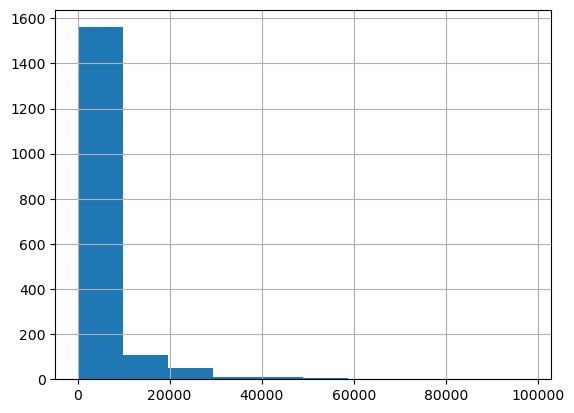

In [99]:
clean_df['current_price'].hist()

In [101]:
##exporrting the cleaned data to a csv
clean_df.to_csv("cleaned_data.csv", index = False)